In [22]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:



ValueError: ignored

In [ ]:
#cargamos los datos de entrada
data = pd.read_csv("/content/drive/MyDrive/Algoritmos/IA/articulos_ml.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

In [24]:
data.head()

NameError: ignored

In [ ]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250
palabras y el más extenso 8401. Intentaremos ver con nuestra relación lineal, si hay una correlación
entre la cantidad de palabras del texto y la cantidad de Shares obtenidos. Hacemos una visualización
en general de los datos de entrada:

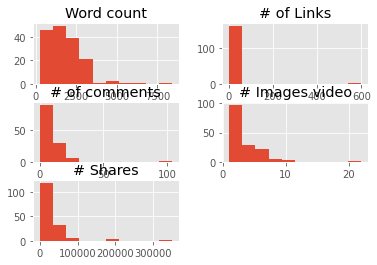

In [ ]:
# visualizamos las características de entrada 
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

En estas gráficas vemos entre qué valores se concentran la mayoría de registros. Vamos a filtrar los
datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también
con los que tengan Cantidad de compartidos menor a 80000. Lo gratificaremos pintando en azul los
puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

In [ ]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
 # esto es en el eje X: entre 0 y 3.500
 # y en el eje Y: entre 0 y 80.000
filtered_data=data[(data['Word count']<=3500) & (data['# Shares']<=80000)]
f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values

In [ ]:
f1

array([1742,  962,  761,  753, 1118, 1581,  256, 1267,  971,  369,  635,
       1631,  571, 1333,  364,  515, 1135,  666,  787,  421, 1065,  908,
       1260,  950, 1761,  911,  971,  458,  458,  782, 2080,  250, 1763,
        650, 1184,  957,  627,  895, 1097, 1262, 1738, 1813, 2400,  662,
        800,  367,  507,  992,  499,  619, 1152, 2363,  988,  759, 1098,
       2797, 1120, 2488, 2049, 2542, 1011, 2189, 1864,  990, 1741, 1229,
       2975, 1864, 2460, 2136, 2833, 1995, 2332, 1998, 3442, 2696, 1913,
       1858, 2457, 2592, 1718, 1293, 3023, 3485, 2093, 1490, 1238, 2583,
       1007,  978, 3019, 2347, 2224, 1778, 1150, 2528, 2486, 2317, 2369,
       1612, 1136, 2721, 3480, 1143, 2428, 2877,  776, 1284, 1145, 1793,
       2904, 1473, 2894, 1932, 3225, 3185, 2068, 2354, 2921, 2211, 2865,
       1674, 2282, 2636,  774, 1030,  734,  743, 1514, 2854, 1443, 1817,
       1266, 2275, 1264, 2212, 1871, 2513, 1443,  912, 2366, 1542, 1201,
       3239, 2566, 2089, 1530,  953])

In [25]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [26]:
from sklearn.datasets import load_boston

In [27]:
boston=load_boston()

In [28]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

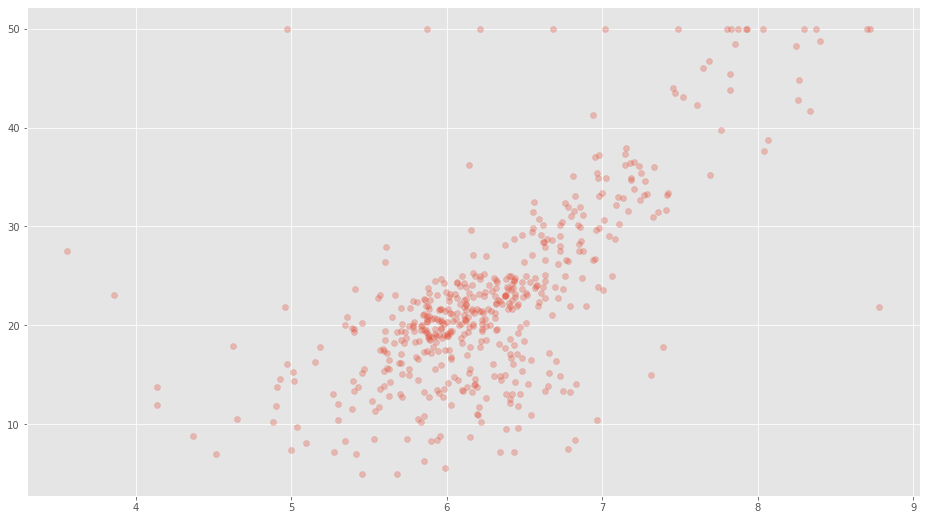

In [30]:
# X Numero medio de habitaciones columna 5
X=np.array(boston.data[:,5])
#variable valor medio de las viviendas
Y=np.array(boston.target)
plt.scatter(X,Y,alpha=0.3)
plt.show()
#Añadimos clumna de 1 para término independiente se puso T para las dimensiones
X=np.array([np.ones(506),X]).T



Formula para minimizar el error cuadratico medio (MC0)
$\beta=(X^TX)^{-1}X^TY$

In [31]:
#@ multiplica matriz
beta=np.linalg.inv(X.T @ X) @ X.T @ Y

In [32]:
# Valor de inteseción con eje y, pendiente de la recta
beta

array([-34.67062078,   9.10210898])

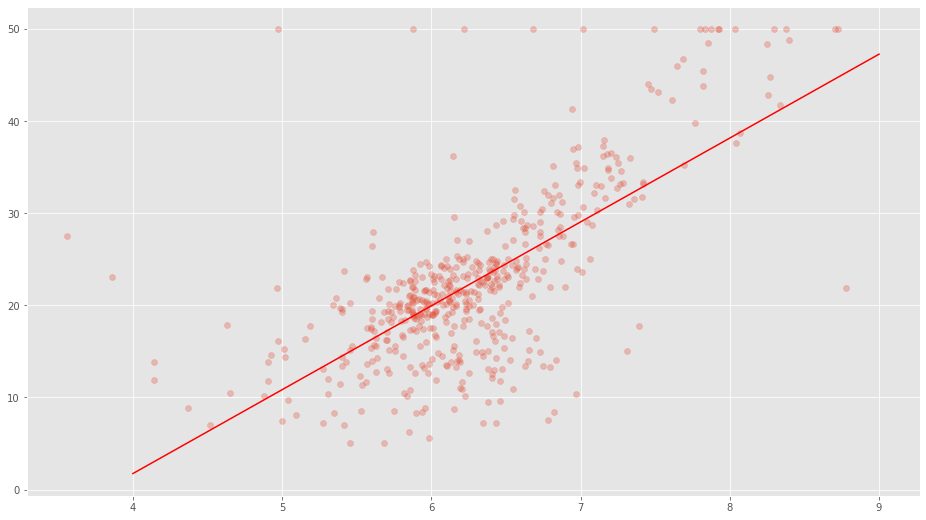

In [37]:
# X Numero medio de habitaciones columna 5
X=np.array(boston.data[:,5])
#variable precio medio de las viviendas
Y=np.array(boston.target)
plt.scatter(X,Y,alpha=0.3)
plt.plot([4,9],[beta[0]+beta[1]*4,beta[0]+beta[1]*9],c='r')
plt.show()

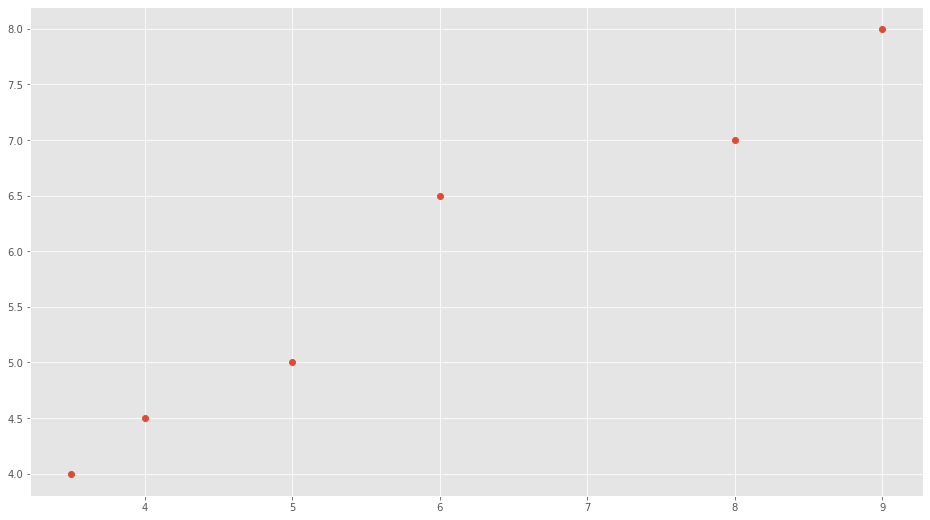

[array([1.]) array([6. , 4. , 8. , 5. , 3.5, 9. ])]
[6.5 4.5 7.  5.  4.  8. ] [6.5 4.5 7.  5.  4.  8. ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [38]:
# X Numero medio de habitaciones columna 5
X=np.array([6,4,8,5,3.5,9])
#variable valor medio de las viviendas
Y=np.array([6.5,4.5,7,5,4,8])
plt.plot(X,Y,'o')
plt.show()
#Añadimos clumna de 1 para término independiente se puso T para las dimensiones
print(np.array([np.ones(1),X]))
X=np.array([np.ones(1),X])
print(Y.T,Y)

In [14]:
#@ multiplica matriz
W=np.linalg.inv(X.T @ X) @ X.T @ Y
print(W)

LinAlgError: ignored

In [18]:
X.T@Y

ValueError: ignored